#XGBoost
---
**Aula Prática 09**: XGBoost para classificação


**Objetivo**: Treinar modelo de classificação


Banco de dados:


**Breast cancer wisconsin dataset**


Disponível via sklearn


> Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.  They describe characteristics of the cell nuclei present in the image.
>
> 1) ID number
>
> 2) Diagnosis (0 = malignant, 1 = benign)
>
> 3-32)
>
> Ten real-valued features are computed for each cell nucleus:
>
> a) radius (mean of distances from center to points on the perimeter)
>
> b) texture (standard deviation of gray-scale values)
>
> c) perimeter
>
> d) area
>
> e) smoothness (local variation in radius lengths)
>
> f) compactness (perimeter^2 / area - 1.0)
>
> g) concavity (severity of concave portions of the contour)
>
> h) concave points (number of concave portions of the contour)
>
> i) symmetry
>
> j) fractal dimension ("coastline approximation" - 1)

##Import das principais funções e leitura dos dados


---



In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets

In [2]:
data = datasets.load_breast_cancer()

In [3]:
df = pd.DataFrame(data.data, columns=data.feature_names)

In [4]:
target = pd.DataFrame(data.target, columns=['Target'])
df = pd.concat([df, target], axis=1)

In [5]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
df.shape

(569, 31)

In [7]:
df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


##Treino de modelo de decision tree
---


Para treinar um modelo de regressão utilizaremos o pacote sklearn.


### Separação do banco entre treino e teste
O primeiro passo para se treinar um modelo é separar o banco entre treino e teste. Para isso utilizaremos a função train_test_split


``` python
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=15)
```
No exemplo acima X é um dataframe contendo as features do modelo e Y um dataframe com a variável target.


O parâmetro test_size controla o percentual de dados que será utilizado para teste.


O parâmetro random_state controla a aleatoriedade da geração do dado, permitindo que ao reexecutar o código seja gerado os mesmos bancos de treino e teste.


É importante separar o banco entre treino e teste, pois utilizaremos o banco de treino para treinar modelos e o banco de teste para avaliar os modelos.


### Treino do modelo
Agora que já possuímos os dados de treino e teste vamos treinar o nosso modelo XGBoost


``` python
from xgboost import XGBClassifier
model = XGBClassifier(objective='binary:logistic')
model.fit(X_train, Y_train)
```

No código acima o objeto model é do tipo XGBClassifier, nele iremos fazer o ajuste do nosso modelo, realizar predições e também ficará armazenado a árvore e a importancia das features.


``` python
# Para fazer predições de classes
model.predict(X_test)
# Para fazer predições de probabilidade
model.predict_proba(X_test)
# Para acessar a importancia
model.feature_importances_

```

Alguns parâmetros da XGBClassifier:
* max_depth: profundidade da árvore. Default é 6.
* seed: semente para aleatoriedade.
* n_estimators*: número de árvores para construir. Default é 100.
* subsample: número de instancias para amostrar.
* colsample_bytree: número de colunas para amostrar ao construir uma árvore. Também é possível por level e por nó.
* objective: tipo de função de perda.
* learning_rate**: parâmetro de aprendizado do modelo. Quanto menor o valor mais árvores são necessarias. Default: 0.3


### Avaliação do modelo
Para avaliar o modelo treinado utilizaremos as métricas vistas na aula teórica.

``` python
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, RocCurveDisplay


# Métricas acurácia, precisão, recall, f1-score
print(classification_report(Y_test, Y_predit))


# Matriz de confusão
confusion_matrix(Y_test, Y_predit)


# AUC
roc_auc = roc_auc_score(Y_test, Y_predict)
fpr, tpr, thresholds = roc_curve(Y_test, Y_predict)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()
```


Também é possível se obter cada uma das métricas do report
``` python
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score


recall_score(Y_test, Y_predict, pos_label=1)
```


### Primeiro modelo

---

Exercício:


* Separe o banco entre treino e teste. Use 30% do banco para teste. Faça a quebra com todas as variáveis.
* Treine um modelo.
* Faça as análises de apuração do modelo


In [9]:
X = pd.DataFrame(data.data, columns=data.feature_names)
Y = data.target

#### Solução

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=15)

In [11]:
Y_train.mean()

0.6256281407035176

In [12]:
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
457,13.21,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,0.05584,...,14.35,34.23,91.29,632.9,0.1289,0.1063,0.13900,0.06005,0.2444,0.06788
349,11.95,14.96,77.23,426.7,0.11580,0.12060,0.01171,0.01787,0.2459,0.06581,...,12.81,17.72,83.09,496.2,0.1293,0.1885,0.03122,0.04766,0.3124,0.07590
521,24.63,21.60,165.50,1841.0,0.10300,0.21060,0.23100,0.14710,0.1991,0.06739,...,29.92,26.93,205.70,2642.0,0.1342,0.4188,0.46580,0.24750,0.3157,0.09671
365,20.44,21.78,133.80,1293.0,0.09150,0.11310,0.09799,0.07785,0.1618,0.05557,...,24.31,26.37,161.20,1780.0,0.1327,0.2376,0.27020,0.17650,0.2609,0.06735
374,13.69,16.07,87.84,579.1,0.08302,0.06374,0.02556,0.02031,0.1872,0.05669,...,14.84,20.21,99.16,670.6,0.1105,0.2096,0.13460,0.06987,0.3323,0.07701


In [ ]:
X_train.shape

In [13]:
from xgboost import XGBClassifier
model = XGBClassifier(objective='binary:logistic')
model.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, RocCurveDisplay

In [14]:
pred_class = model.predict(X_test)

In [16]:
print(classification_report(Y_test, pred_class))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93        63
           1       0.94      0.98      0.96       108

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



In [ ]:
from sklearn.metrics import recall_score

In [ ]:
recall_score(Y_test, pred_class)

In [ ]:
recall_score(Y_test, pred_class, pos_label=0)

In [17]:
roc_auc = roc_auc_score(Y_test, pred_class)
roc_auc

0.9351851851851851

In [18]:
pred_proba = model.predict_proba(X_test)[:, 1]

In [19]:
pred_proba

array([9.9965835e-01, 9.9961746e-01, 3.3062163e-03, 9.9937952e-01,
       9.9921668e-01, 5.8726221e-04, 9.9927241e-01, 9.9955982e-01,
       9.9338502e-01, 9.9979740e-01, 3.9941279e-04, 6.5567071e-04,
       9.9968755e-01, 9.9972719e-01, 9.9965191e-01, 9.9952662e-01,
       9.9578345e-01, 9.8745328e-01, 9.9971551e-01, 9.9956590e-01,
       9.9966335e-01, 4.0010333e-01, 9.9977928e-01, 9.9898058e-01,
       9.5238185e-01, 5.5802111e-03, 9.9778557e-01, 6.4959587e-03,
       9.9977928e-01, 2.1464753e-04, 9.9964082e-01, 9.4793528e-01,
       9.9846917e-01, 5.8771396e-01, 9.9982125e-01, 9.9899822e-01,
       9.9955910e-01, 9.5003480e-01, 9.9977893e-01, 9.9965644e-01,
       8.3284657e-03, 2.3185961e-02, 2.2310715e-03, 7.3926635e-03,
       2.7932756e-04, 5.6481045e-01, 9.9928600e-01, 9.9321508e-01,
       9.9937326e-01, 5.2912912e-04, 5.7558494e-04, 9.9963319e-01,
       9.9974900e-01, 9.9974984e-01, 9.9985898e-01, 9.9831700e-01,
       9.9970067e-01, 9.5586205e-01, 1.0409606e-02, 9.9966562e

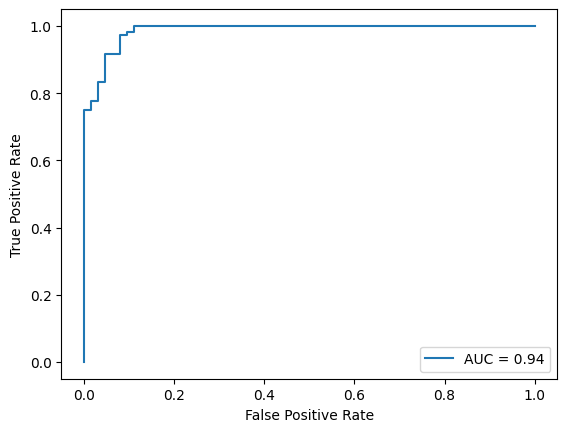

In [20]:
fpr, tpr, thresholds = roc_curve(Y_test, pred_proba)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()

Exercício:
* Treine um novo modelo porém com max_depth = 4
* Busca o limiar em que se obtém a melhor acurácia.

Dica:
Para realizar a busca faça:
1. Gere o score de probabilidade
2. Percorra uma lista de valores de limiar e a cada valor calcule a acurácia
3. Obtenha o limiar com maior acurácia


Para acessar P(Y=1) faça predict_proba()[:, 1]

#### Solução

In [21]:
model = XGBClassifier(objective='binary:logistic', max_depth=4)
model.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [22]:
predict_proba = model.predict_proba(X_test)

In [24]:
from sklearn.metrics import accuracy_score

predict_proba = model.predict_proba(X_test)[:, 1]
acc_atual = 0
thr_otimo = 0
for thr in np.arange(0, 1, .1):
  acc = accuracy_score(Y_test, predict_proba>=thr)
  if acc >= acc_atual:
    thr_otimo = thr
    acc_atual = acc

In [25]:
acc_atual

0.9532163742690059

In [26]:
thr_otimo

0.2

In [27]:
import plotly.express as px

acc_lista = []
for thr in np.arange(0, 1, .01):
  acc_lista.append(accuracy_score(Y_test, predict_proba>=thr))

px.line(x=np.arange(0, 1, .01), y=acc_lista)

**Visualização da feature importance**

In [28]:
df = pd.DataFrame(model.feature_importances_.T, index=data.feature_names, columns=['Importancia'])
df.sort_values('Importancia', ascending=False)

,Importancia
worst perimeter,0.335828
worst area,0.321468
worst concave points,0.060545
worst compactness,0.036365
mean texture,0.031994
mean concave points,0.028932
fractal dimension error,0.026516
texture error,0.024690
worst texture,0.020837
mean concavity,0.017242


In [29]:
px.bar(df.sort_values('Importancia'))

In [30]:
X_train_valid, X_test, Y_train_valid, Y_test = train_test_split(X, Y, test_size=.2, random_state=15)

In [31]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train_valid, Y_train_valid, test_size=1/8, random_state=15)

In [32]:
X_train.shape[0]/X.shape[0]

0.6994727592267135

In [33]:
X_valid.shape[0]/X.shape[0]

0.10017574692442882

In [34]:
X_test.shape[0]/X.shape[0]

0.20035149384885764

In [35]:
model = XGBClassifier(objective='binary:logistic', max_depth=4,
                      verbosity=2, n_estimators=200)
model.fit(X_train, Y_train, eval_set=[(X_valid, Y_valid)], verbose=True)

[0]	validation_0-logloss:0.44916
[1]	validation_0-logloss:0.33499
[2]	validation_0-logloss:0.26720
[3]	validation_0-logloss:0.22322
[4]	validation_0-logloss:0.18611
[5]	validation_0-logloss:0.16483
[6]	validation_0-logloss:0.15397
[7]	validation_0-logloss:0.14341
[8]	validation_0-logloss:0.14406
[9]	validation_0-logloss:0.14363
[10]	validation_0-logloss:0.13807
[11]	validation_0-logloss:0.13373
[12]	validation_0-logloss:0.13910
[13]	validation_0-logloss:0.14634
[14]	validation_0-logloss:0.14877
[15]	validation_0-logloss:0.15324
[16]	validation_0-logloss:0.15806
[17]	validation_0-logloss:0.16461
[18]	validation_0-logloss:0.16172
[19]	validation_0-logloss:0.16695
[20]	validation_0-logloss:0.16343
[21]	validation_0-logloss:0.15907
[22]	validation_0-logloss:0.16385
[23]	validation_0-logloss:0.16600
[24]	validation_0-logloss:0.17005
[25]	validation_0-logloss:0.16464
[26]	validation_0-logloss:0.16504
[27]	validation_0-logloss:0.16337
[28]	validation_0-logloss:0.16564
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [37]:
model = XGBClassifier(objective='binary:logistic', max_depth=4,
                      verbosity=2, learning_rate=.001)
model.fit(X_train, Y_train, eval_set=[(X_valid, Y_valid)], verbose=True)

[0]	validation_0-logloss:0.64989
[1]	validation_0-logloss:0.64910
[2]	validation_0-logloss:0.64831
[3]	validation_0-logloss:0.64751
[4]	validation_0-logloss:0.64674
[5]	validation_0-logloss:0.64595
[6]	validation_0-logloss:0.64517
[7]	validation_0-logloss:0.64439
[8]	validation_0-logloss:0.64361
[9]	validation_0-logloss:0.64283
[10]	validation_0-logloss:0.64205
[11]	validation_0-logloss:0.64127
[12]	validation_0-logloss:0.64050
[13]	validation_0-logloss:0.63972
[14]	validation_0-logloss:0.63895
[15]	validation_0-logloss:0.63819
[16]	validation_0-logloss:0.63742
[17]	validation_0-logloss:0.63666
[18]	validation_0-logloss:0.63589
[19]	validation_0-logloss:0.63514
[20]	validation_0-logloss:0.63438
[21]	validation_0-logloss:0.63361
[22]	validation_0-logloss:0.63286
[23]	validation_0-logloss:0.63210
[24]	validation_0-logloss:0.63134
[25]	validation_0-logloss:0.63059
[26]	validation_0-logloss:0.62985
[27]	validation_0-logloss:0.62910
[28]	validation_0-logloss:0.62835
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [36]:
model = XGBClassifier(objective='binary:logistic', max_depth=4,
                      verbosity=2, learning_rate=.1)
model.fit(X_train, Y_train, eval_set=[(X_valid, Y_valid)], verbose=True)

[0]	validation_0-logloss:0.57522
[1]	validation_0-logloss:0.51430
[2]	validation_0-logloss:0.46190
[3]	validation_0-logloss:0.41769
[4]	validation_0-logloss:0.37813
[5]	validation_0-logloss:0.34708
[6]	validation_0-logloss:0.31963
[7]	validation_0-logloss:0.29454
[8]	validation_0-logloss:0.27405
[9]	validation_0-logloss:0.25595
[10]	validation_0-logloss:0.23837
[11]	validation_0-logloss:0.22440
[12]	validation_0-logloss:0.21168
[13]	validation_0-logloss:0.20201
[14]	validation_0-logloss:0.19269
[15]	validation_0-logloss:0.18499
[16]	validation_0-logloss:0.17767
[17]	validation_0-logloss:0.17207
[18]	validation_0-logloss:0.16431
[19]	validation_0-logloss:0.15707
[20]	validation_0-logloss:0.15073
[21]	validation_0-logloss:0.14751
[22]	validation_0-logloss:0.14256
[23]	validation_0-logloss:0.13808
[24]	validation_0-logloss:0.13413
[25]	validation_0-logloss:0.13232
[26]	validation_0-logloss:0.13156
[27]	validation_0-logloss:0.12985
[28]	validation_0-logloss:0.13012
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [38]:
model = XGBClassifier(objective='binary:logistic', max_depth=4, verbosity=2, early_stopping_rounds=10)
model.fit(X_train, Y_train, eval_set=[(X_valid, Y_valid)], verbose=True)

[0]	validation_0-logloss:0.44916
[1]	validation_0-logloss:0.33499
[2]	validation_0-logloss:0.26720
[3]	validation_0-logloss:0.22322
[4]	validation_0-logloss:0.18611
[5]	validation_0-logloss:0.16483
[6]	validation_0-logloss:0.15397
[7]	validation_0-logloss:0.14341
[8]	validation_0-logloss:0.14406
[9]	validation_0-logloss:0.14363
[10]	validation_0-logloss:0.13807
[11]	validation_0-logloss:0.13373
[12]	validation_0-logloss:0.13910
[13]	validation_0-logloss:0.14634
[14]	validation_0-logloss:0.14877
[15]	validation_0-logloss:0.15324
[16]	validation_0-logloss:0.15806
[17]	validation_0-logloss:0.16461
[18]	validation_0-logloss:0.16172
[19]	validation_0-logloss:0.16695
[20]	validation_0-logloss:0.16343
[21]	validation_0-logloss:0.15907


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
model = XGBClassifier(objective='binary:logistic', learning_rate=.1, verbosity=2)
model.fit(X_train, Y_train, eval_set=[(X_valid, Y_valid)], verbose=True)